This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [264]:
import pandas as pd

In [321]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: `Your Answer Here`Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.

**Token**: `Your Answer Here` Token: how we process text to analyze it; it can be a sentence, paragraph, etc. What most people mean word. A token can mean anything useful semantic unit. What do we call a row in our data set.
**Corpus**: `Your Answer Here`Corpus: collection of documents
\

**Stopwords**: `Your Answer Here` Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.'asdas'da
	- Unecessary words


**Statistical Trimming**: `Your Answer Here` Preserve the words the give the most variation in the data.

**Stemming**: `Your Answer Here` Stemming is just process for removing common ending to words

**Lemmatization**: `Your Answer Here` Transform a word into its based form called lemma

**Vectorization**: `Your Answer Here` The objective is to Convert a collection of text documents to into a matrix of features (word counts etc.)The process of converting words into numbers are called Vectorization; https://towardsdatascience.com/understanding-nlp-word-embeddings-text-vectorization-1a23744f7223#:~:text=Word%20Embeddings%20or%20Word%20vectorization,into%20numbers%20are%20called%20Vectorization.

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
remove whitespaces and escape sequences, punctuations, special characters, numbers, and stopwords.
 1. `Your Answer Here` 
 2. `Your Answer Here`
 3. `Your Answer Here`
 4. `Your Answer Here`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
Your Answer Here

```
b/c we can have domain specific words that occur in abundace for example analyzubg amazon we could the word amazon be stop word.



3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Your Answer Here
```
Statistical stop word trimming parameters.. Ignore terms that are very frequent.in the case of min it does the oppposite ,minimum frequency to hit to be included in the vocabulary!

4. Why do we need to vectorize our documents?
```
Your Answer Here
```
we vectorize documents for various reasons:we could vectorize to create a model that allows us to make preductions for a given text, based on a model that was train on a vectorized maxtrix; we could also vectorization to see how similar one document is to another;lastly we could use vecrtorization to help us construct and LDA which helps us find topics for a given document. 


## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [323]:
#clean data frame
# [^a-zA-Z 0-9] ; removes non-alpha-numeric characters
#\d+': '' ; removes all numbers
#will make this all a function later
df['Description'].replace({"[^a-zA-Z 0-9]":""}, regex=True, inplace = True)
#df['Description'] = df['Description'].str.lower()
#df['Description'] = df['Description'].str.strip()
df.dropna(inplace=True)


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2277 non-null   object 
 1   Type         2277 non-null   object 
 2   Rating       2277 non-null   float64
 3   Effects      2277 non-null   object 
 4   Flavor       2277 non-null   object 
 5   Description  2277 non-null   object 
dtypes: float64(1), object(5)
memory usage: 124.5+ KB


In [325]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",100 OG is a 5050 hybrid strain that packs a st...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The 98 Aloha White Widow is an especially pote...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativadominant hybrid bred in Spain ...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",Also known as Kosher Tangie 24k Gold is a 60 i...


In [326]:
#import spacy, will be used t
import spacy
nlp = spacy.load("en_core_web_lg")
#added specific stopwords to the stop words found in nlp.Defaults.stop_words.
stops = nlp.Defaults.stop_words.union(['known','strain','gold'])
#Create tokenized functioned, which excludes stopwords, punction, whitespaces etc. and normalizes lowercasetoo

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.lower() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_space == False) and (token.pos_ != 'PRON')]



In [313]:
# Wrap it all in a function
import spacy
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        condition = ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.is_space == False)
        if condition:
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [327]:
#create remove custom stop words from tokens
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [328]:
df['tokens'] = df['Description'].apply(tokenize)

In [329]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",100 OG is a 5050 hybrid strain that packs a st...,"[100, og, 5050, hybrid, strain, pack, strong, ..."
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The 98 Aloha White Widow is an especially pote...,"[98, aloha, white, widow, especially, potent, ..."
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativadominant hybrid bred in Spain ...,"[1024, sativadominant, hybrid, breed, spain, m..."
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",Also known as Kosher Tangie 24k Gold is a 60 i...,"[know, kosher, tangie, 24k, gold, 60, indicado..."


In [330]:
#further clean tokens
df['tokens'] = df['tokens'].apply(remove_stops)

Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [331]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",100 OG is a 5050 hybrid strain that packs a st...,"[100, og, 5050, hybrid, pack, strong, punch, s..."
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The 98 Aloha White Widow is an especially pote...,"[98, aloha, white, widow, especially, potent, ..."
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativadominant hybrid bred in Spain ...,"[1024, sativadominant, hybrid, breed, spain, m..."
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",Also known as Kosher Tangie 24k Gold is a 60 i...,"[know, kosher, tangie, 24k, 60, indicadominant..."


In [289]:
#construct count function
from collections import Counter

def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [290]:
#Get counts of tokenized listings
word_count = count(df['tokens'])

In [291]:
word_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13,strain,1776,2892,1.0,0.028175,0.028175,0.779974
21,effect,1272,1551,2.0,0.015110,0.043285,0.558630
33,hybrid,1042,1231,3.0,0.011993,0.055278,0.457620
206,cross,1017,1090,4.0,0.010619,0.065897,0.446640
10,og,472,1025,5.0,0.009986,0.075883,0.207290
...,...,...,...,...,...,...,...
9220,presumably,1,1,9221.0,0.000010,0.999961,0.000439
9222,heavilythis,1,1,9222.0,0.000010,0.999971,0.000439
9218,tank,1,1,9223.0,0.000010,0.999981,0.000439
9219,gansettfin,1,1,9224.0,0.000010,0.999990,0.000439


In [148]:
#strain is the most popular word

Run the line of code below, and then explain how to interpret the graph.

```
Your Answer Here
```

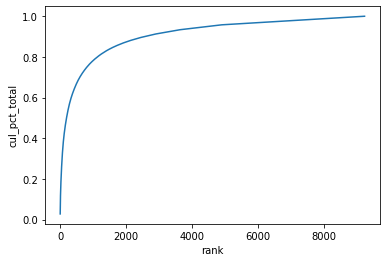

In [149]:
import seaborn as sns
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Your Answer Here`

**Document Term Matrix (DTM)**: `Your Answer Here`

**Latent Semantic Analysis**: `Your Answer Here`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `Your Answer Here`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `Your Answer Here`

**Skip-Gram**: `Your Answer Here`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Your Answer Here
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Your Answer Here
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Your Answer Here
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

In [165]:
df.head(20)

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",100 OG is a 5050 hybrid strain that packs a st...,"[100, og, 5050, hybrid, strain, pack, strong, ..."
1,98-White-Widow,hybrid,5,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The 98 Aloha White Widow is an especially pote...,"[98, aloha, white, widow, especially, potent, ..."
2,1024,sativa,4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativadominant hybrid bred in Spain ...,"[1024, sativadominant, hybrid, breed, spain, m..."
3,13-Dawgs,hybrid,4,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,5,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",Also known as Kosher Tangie 24k Gold is a 60 i...,"[know, kosher, tangie, 24k, gold, 60, indicado..."
5,3-Bears-Og,indica,0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...,"[3, bears, og, mephisto, genetics, autofloweri..."
6,3-Kings,hybrid,4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent",The 3 Kings marijuana strain a holy trinity of...,"[3, king, marijuana, strain, holy, trinity, he..."
7,303-Og,indica,4,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",The indicadominant 303 OG is a Colorado strain...,"[indicadominant, 303, og, colorado, strain, br..."
8,3D-Cbd,sativa,5,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD from Snoop Doggs branded line of cannab...,"[3d, cbd, snoop, doggs, brand, line, cannabis,..."
9,3X-Crazy,indica,4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",Also known as Optimus Prime the indicadominant...,"[know, optimus, prime, indicadominant, 3x, cra..."


In [179]:
#import TfidfVectorizer, were going to use this to vectorizet the tokens column
from sklearn.feature_extraction.text import TfidfVectorizer

#We want to convert a collection of raw documents to a matrix of TF-IDF features
#The goal is to vectorize our Description
# Tunning Parameters
# Instantiate vectorizer object
tfidf = TfidfVectorizer(ngram_range=(1,2),
                        max_df=.97,
                        min_df=.02,
                        tokenizer = tokenize
                        )
data = df
# And create a vocabulary and get word counts per document

# Similiar to fit_predict
dtm= tfidf.fit_transform(data.Description)

print(dtm)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

  (0, 278)	0.2539252349674857
  (0, 40)	0.22263754085692442
  (0, 176)	0.25897201205094644
  (0, 201)	0.1903236125816137
  (0, 326)	0.1389000964025146
  (0, 59)	0.1593690132741868
  (0, 319)	0.1846975647314755
  (0, 277)	0.1322403765279542
  (0, 204)	0.12514866630544064
  (0, 122)	0.0853623639572682
  (0, 38)	0.12815487677516274
  (0, 415)	0.23961970613531203
  (0, 47)	0.12105486035902667
  (0, 175)	0.16707805519235433
  (0, 99)	0.2221006091954103
  (0, 226)	0.20889674455370938
  (0, 298)	0.1653708805431215
  (0, 392)	0.22713691142942297
  (0, 292)	0.15366693114720748
  (0, 192)	0.14064280501925308
  (0, 303)	0.2633794555368817
  (0, 378)	0.3221320915927574
  (0, 370)	0.06733323981159581
  (0, 198)	0.09616724853000204
  (0, 5)	0.2600405853208592
  :	:
  (2276, 187)	0.17497699108781303
  (2276, 428)	0.13654598177818195
  (2276, 35)	0.30157629091112875
  (2276, 286)	0.135237375697936
  (2276, 162)	0.17969004013751702
  (2276, 306)	0.12812561625009938
  (2276, 84)	0.11904871813461734
  (2

,1,10,11,1st,20,5050,60,70,8,8 9,...,week,week flower,white,white widow,widow,win,work,world,x,yield
0,0.0,0.0,0.0,0.000000,0.0,0.260041,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.136748,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.395585,0.50553,0.498483,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.208853,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

In [180]:
#Build Nearest Neighbors Model
from sklearn.neighbors import NearestNeighbors

# instantiate neareast neighboors model, we want to find the 5 nearest neighboors to strain 100-OG
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
#Fit on the document term matrix dtm
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [181]:
#Make a query based on the 100-OG strain
strain_100_OG= [""" 100-OG strain"""]
query = tfidf.transform(strain_100_OG)

In [185]:
#find the 5 nearest neighboors
nn.kneighbors(query.todense())

(array([[1.        , 1.        , 1.        , 1.        , 1.06187646]]),
 array([[1605, 1698, 1606, 1607, 1681]]))

In [186]:
#The nearest neighboors are strains in rows 1605,1606,1607,1681

In [188]:
# Inspect Most relevant result
data.Description[1605]

'Pineapple Super Silver Haze from Fire Bros is a sativa strain that modifies the widely cherished Super Silver Haze with a Pineapple hybrid strain This second parent is thought to be either Pineapple Express or Pineapple a phenotype of Ed Rosenthal Super Bud The Haze genetics in this strain come through in both flavor and effect as Pineapple Super Silver Haze delivers a highflying cerebral buzz alongside a spicy zesty flavor Its aroma is more of a tropical medley of candied mango pineapple and oranges Like a cup of coffee this sativa is a perfect pickmeup with motivating talkative and creative effects and minimal heaviness in the body'

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the Rating column in df.

In [189]:
df['Rating'] = df['Rating'].round().astype(int)

In [190]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description,tokens
0,100-Og,hybrid,4,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",100 OG is a 5050 hybrid strain that packs a st...,"[100, og, 5050, hybrid, strain, pack, strong, ..."
1,98-White-Widow,hybrid,5,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The 98 Aloha White Widow is an especially pote...,"[98, aloha, white, widow, especially, potent, ..."
2,1024,sativa,4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativadominant hybrid bred in Spain ...,"[1024, sativadominant, hybrid, breed, spain, m..."
3,13-Dawgs,hybrid,4,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,5,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",Also known as Kosher Tangie 24k Gold is a 60 i...,"[know, kosher, tangie, 24k, gold, 60, indicado..."


In [191]:
#find the counts for ratings column
df['Rating'].value_counts(normalize=True)

4    0.601669
5    0.357049
0    0.028986
3    0.010979
2    0.000878
1    0.000439
Name: Rating, dtype: float64

What is the baseline accuracy?
```
Your Answer Here
```

Visualize the rating counts from above

<AxesSubplot:xlabel='Rating', ylabel='count'>

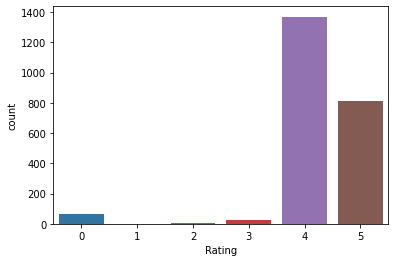

In [192]:
#Make value counts of Ratings Column
sns.countplot(x='Rating', data=df)

# Use your vectorized tokens in the `df` dataframe to train a classification model

In [198]:
#import necessary models to make model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


In [216]:
data.Description

0       100 OG is a 5050 hybrid strain that packs a st...
1       The 98 Aloha White Widow is an especially pote...
2       1024 is a sativadominant hybrid bred in Spain ...
3       13 Dawgs is a hybrid of G13 and Chemdawg genet...
4       Also known as Kosher Tangie 24k Gold is a 60 i...
                              ...                        
2346    Zeus OG is ahybrid cross between Pineapple OG ...
2347    Zkittlez is an indicadominant mix of Grape Ape...
2348    Zombie Kush by Ripper Seeds comes from two dif...
2349    If youre looking to transform into a flesheati...
2350    Zoom Pie also known as Zombie Pie is a heavy i...
Name: Description, Length: 2277, dtype: object

In [235]:
# under the hood for what happens inside pipeline
# # X = vect.fit_transform(data.Description)
# # X_matrix = pd.DataFrame(X.todense(), columns=vect.get_feature_names())
# # X_matrix
# dummy_model = RandomForestClassifier().fit(X_matrix, data.Rating)

In [243]:
# #Get word vectors for data
# def get_word_vectors(docs):
#     return [nlp(doc).vector for doc in docs]

# #Apply grid search on train description(data) and use param from above
# train_vectorized = get_word_vectors(data.Description)

# train_vectorized[1]
# array([ 1.51370736e-02,  1.12282842e-01, -2.74586733e-02, -3.14401165e-02,
#         1.07745141e-01,  1.55786537e-02,  3.29349227e-02, -2.85603981e-02,
#        -2.80274190e-02,  1.43373537e+00, -3.48883234e-02, -5.17732613e-02,
#        -9.86212492e-02, -8.35122168e-02,  4.03370224e-02, -7.39314258e-02,

In [203]:
# Define the Pipeline
#Insert TfidVectorizer and RandomForestClassifier Into one Pipeline
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()
# Define the Pipeline
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect),
                 #This will produce a document term matrix which will be used in the classifier to come up with a prediction
                 # Classifier
                 ('clf', rfc)
                ])

params= {
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators':(100,)
}

In [250]:
#Perform a random search cv , based on Tfidf vectorize and randoforesstclassifier Pipeline
random_search = RandomizedSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
random_search.fit(data.Description, data.Rating)

/Users/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-N2EbWurJ/lib/python3.8/site-packages/sklearn/model_selection/_search.py:277: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-N2EbWurJ/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('vect',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                                        

# Predict the score of the fake strain description below.

```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

In [210]:
random_search.predict([""" Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors."""])


array([4])

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP? (TOPIC MODELLING)
```
Your Answer Here
What is topic modeling?
Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.
A document can be a part of multiple topics, kind of like in fuzzy clustering(soft clustering) in which each data point belongs to more than one cluster.


LDA
It is one of the most popular topic modeling methods. Each document is made up of various words, and each topic also has various words belonging to it. The aim of LDA is to find topics a document belongs to, based on the words in it. 

https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model and belongs to the machine learning toolbox 
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

```

2. How do interpret the results of a topic modeling output?
```
Your Answer Here

We interpret the results using visualizatoins... by looking at how the bubbles produce in the visualizations circles interact with each other.
	- Were trying to see if the topics are overlapping
	- Can see the distances between topic,gives and understanding of how related the topics are to each other.
    - Bubble size indicates the relative size in the corpus,  especially how many documents have this topic!
    - The lambda value also gives us information of how important words or to the topic to the entire document or how important it is to the topic itself.

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In [251]:
#Import gensim, will be used to create LDA model
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [253]:
# Dict representation of all our keyword
# This also represents the fit step
id2word = corpora.Dictionary(df['tokens'])

In [254]:
#number of keys
len(id2word.keys())

9225

In [255]:
#fiiltering step (statistical triiming)
#we don't want keys with frequency above 85 percent and we want a minimum frequency of 15 present
id2word.filter_extremes(no_below=15, no_above=0.85)

In [257]:
#This represents our transform statement
corpus = [id2word.doc2bow(text) for text in df['tokens']]

In [258]:
#create lda model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   passes=50, 
                   workers=4
                  )

In [259]:
#print topics of lda model
lda.print_topics()

[(0,
  '0.035*"strain" + 0.027*"effect" + 0.022*"hybrid" + 0.019*"blue" + 0.014*"sweet" + 0.014*"blueberry" + 0.014*"aroma" + 0.013*"pain" + 0.012*"flavor" + 0.011*"sativadominant"'),
 (1,
  '0.039*"strain" + 0.023*"effect" + 0.022*"cross" + 0.015*"consumer" + 0.015*"physical" + 0.014*"aroma" + 0.013*"body" + 0.013*"offer" + 0.012*"kush" + 0.011*"cookies"'),
 (2,
  '0.038*"strain" + 0.030*"sativa" + 0.026*"sour" + 0.024*"diesel" + 0.021*"effect" + 0.020*"haze" + 0.014*"skunk" + 0.012*"cross" + 0.012*"hybrid" + 0.011*"aroma"'),
 (3,
  '0.057*"og" + 0.042*"kush" + 0.038*"strain" + 0.021*"indica" + 0.019*"hybrid" + 0.018*"effect" + 0.014*"purple" + 0.013*"aroma" + 0.012*"body" + 0.011*"pain"'),
 (4,
  '0.029*"strain" + 0.026*"flower" + 0.025*"bud" + 0.022*"plant" + 0.018*"high" + 0.017*"indica" + 0.016*"white" + 0.015*"week" + 0.015*"hybrid" + 0.014*"purple"')]

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

In [260]:

#apply regular expression to see most important words associated with each topic in a more readble way
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]
words

[['"strain"',
  '"effect"',
  '"hybrid"',
  '"blue"',
  '"sweet"',
  '"blueberry"',
  '"aroma"',
  '"pain"',
  '"flavor"',
  '"sativadominant"'],
 ['"strain"',
  '"effect"',
  '"cross"',
  '"consumer"',
  '"physical"',
  '"aroma"',
  '"body"',
  '"offer"',
  '"kush"',
  '"cookies"'],
 ['"strain"',
  '"sativa"',
  '"sour"',
  '"diesel"',
  '"effect"',
  '"haze"',
  '"skunk"',
  '"cross"',
  '"hybrid"',
  '"aroma"'],
 ['"og"',
  '"kush"',
  '"strain"',
  '"indica"',
  '"hybrid"',
  '"effect"',
  '"purple"',
  '"aroma"',
  '"body"',
  '"pain"'],
 ['"strain"',
  '"flower"',
  '"bud"',
  '"plant"',
  '"high"',
  '"indica"',
  '"white"',
  '"week"',
  '"hybrid"',
  '"purple"']]

In [261]:
#convert topic labels from a list format to string format, pass string into topic labels
#Pick top 5 word labels
topic_labels= [', '.join(t[0:5]) for t in words]
topic_labels

['"strain", "effect", "hybrid", "blue", "sweet"',
 '"strain", "effect", "cross", "consumer", "physical"',
 '"strain", "sativa", "sour", "diesel", "effect"',
 '"og", "kush", "strain", "indica", "hybrid"',
 '"strain", "flower", "bud", "plant", "high"']

In [262]:
#print topic labels in nice format
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"strain", "effect", "hybrid", "blue", "sweet"

------ Topic 1 ------
"strain", "effect", "cross", "consumer", "physical"

------ Topic 2 ------
"strain", "sativa", "sour", "diesel", "effect"

------ Topic 3 ------
"og", "kush", "strain", "indica", "hybrid"

------ Topic 4 ------
"strain", "flower", "bud", "plant", "high"



Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling

In [ ]:
#added specific stopwords to the stop words found in nlp.Defaults.stop_words.
stops = nlp.Defaults.stop_words.union(['stars','review','price','time'])

#create remove custom stop words, will help with further cleaning tokens
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords